In [1]:
import functies
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

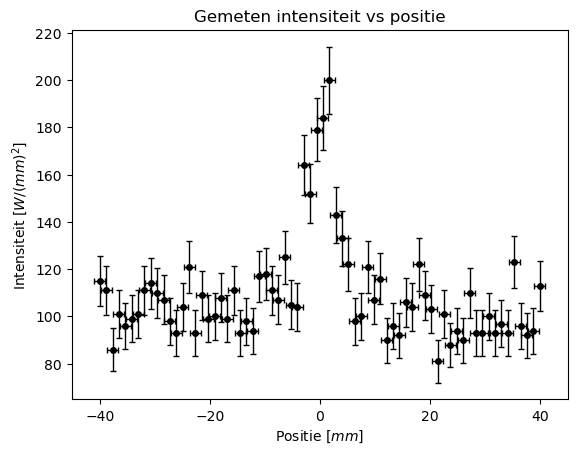

In [2]:
dataset = 6 #Geeft aan welke dataset gefit moet worden
data = np.loadtxt("data_fitopgave/%s.txt" %dataset, delimiter  =" ").T #Data inladen en in onderstaande regels uitpakken
positie, intensiteit = data[0], data[1]
y_fouten = np.sqrt(intensiteit)
x_fouten = np.full(len(positie), 1)
fig, ax = plt.subplots(1,1) #De data plotten
ax.errorbar(positie, intensiteit, xerr = x_fouten, yerr = y_fouten, fmt = 'ko', ecolor = 'k', capsize = 2.5, markersize = 4, elinewidth = 1)
ax.set_xlabel("Positie $[mm]$")
ax.set_ylabel("Intensiteit $[W/(mm)^2]$")
ax.set_title("Gemeten intensiteit vs positie")
plt.show()

In [3]:
def model(x, param):
    x_0, gamma, A, y_0 = param
    return (A/np.pi) * (gamma/((x-x_0)**2 + gamma**2)) + y_0
    
    
def initial_vals_chi2(x_val, y_val):
    y_0_gok = np.min(y_val)
    x_0_gok = x_val[np.argmax(y_val)]
    x_close = max(x_val[np.argmax(y_val) + 1], x_val[np.argmax(y_val)-1])
    y_close = y_val[np.where(x_val == x_close)][0] - y_0_gok #Dit rekent verder gemakkelijker
    y_max = np.max(y_val) - y_0_gok #Idem
    gamma_gok = abs(x_0_gok - x_close)*np.sqrt(y_close/(y_max - y_close))
    A_gok = gamma_gok * np.pi * y_max
    return np.array([x_0_gok, gamma_gok, A_gok, y_0_gok])

parameters = list(sp.symbols("x_0 gamma A y_0"))


Ditctionary van minimize:
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 60.992814497622454
        x: [ 2.456e-01  1.991e+00 ...  3.884e+01  4.000e+01]
      nit: 55
      jac: [-1.030e-04  3.719e-05 ...  4.768e-07  0.000e+00]
 hess_inv: [[ 1.004e-01  1.670e-02 ...  1.549e-05 -5.370e-06]
            [ 1.670e-02  2.331e-01 ...  2.576e-05 -1.885e-04]
            ...
            [ 1.549e-05  2.576e-05 ...  9.999e-01  2.561e-05]
            [-5.370e-06 -1.885e-04 ...  2.561e-05  9.999e-01]]
     nfev: 7062
     njev: 94
---------------------------
Minimale parameter waardes:
[2.45588639e-01 1.99126246e+00 7.38192562e+02 9.97221067e+01]
---------------------------
Minimale hybrid waardes:
[ 2.45588639e-01  1.99126246e+00  7.38192562e+02  9.97221067e+01
 -3.99981380e+01 -3.88390382e+01 -3.76839451e+01 -3.65215664e+01
 -3.53631961e+01 -3.42031549e+01 -3.30432646e+01 -3.18813266e+01
 -3.07208568e+01 -2.95621124e+01 -2.84033255

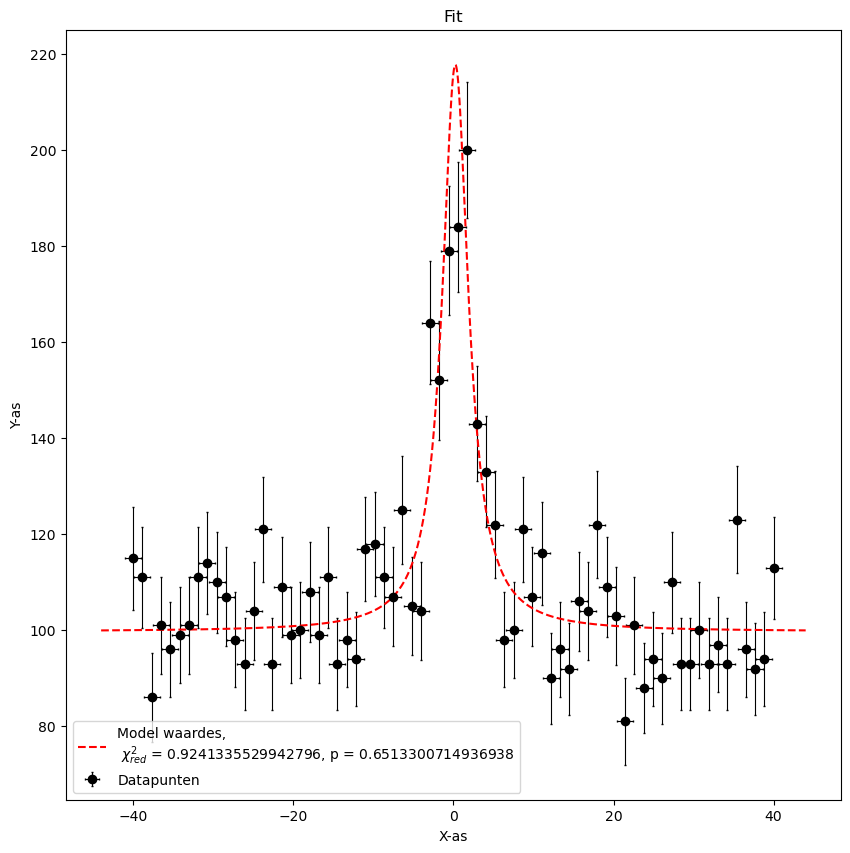

In [4]:
import functies
parameter_vals = functies.fit_2D(parameters, model, initial_vals_chi2, positie, intensiteit, (x_fouten**2), y_fouten**2, detailed_logs= True)

Ditctionary van minimize:
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 60.992814497622454
        x: [ 2.456e-01  1.991e+00 ...  3.884e+01  4.000e+01]
      nit: 55
      jac: [-1.030e-04  3.719e-05 ...  4.768e-07  0.000e+00]
 hess_inv: [[ 1.004e-01  1.670e-02 ...  1.549e-05 -5.370e-06]
            [ 1.670e-02  2.331e-01 ...  2.576e-05 -1.885e-04]
            ...
            [ 1.549e-05  2.576e-05 ...  9.999e-01  2.561e-05]
            [-5.370e-06 -1.885e-04 ...  2.561e-05  9.999e-01]]
     nfev: 7062
     njev: 94
---------------------------
Minimale parameter waardes:
[2.45588639e-01 1.99126246e+00 7.38192562e+02 9.97221067e+01]
---------------------------
Minimale hybrid waardes:
[ 2.45588639e-01  1.99126246e+00  7.38192562e+02  9.97221067e+01
 -3.99981380e+01 -3.88390382e+01 -3.76839451e+01 -3.65215664e+01
 -3.53631961e+01 -3.42031549e+01 -3.30432646e+01 -3.18813266e+01
 -3.07208568e+01 -2.95621124e+01 -2.84033255

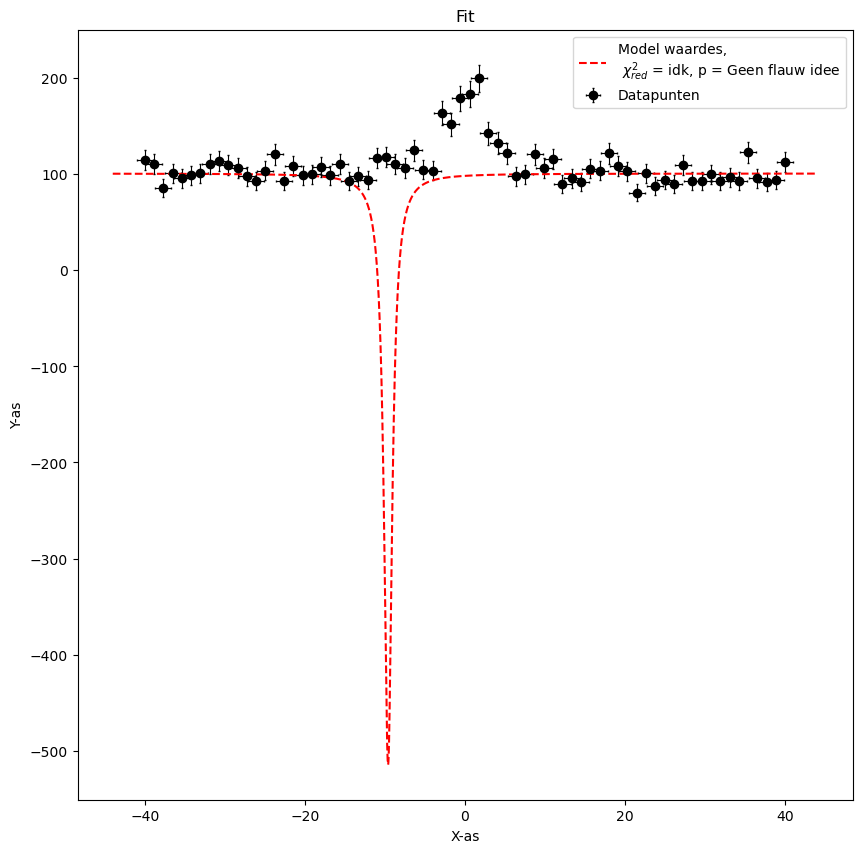

In [5]:
nieuwe_parameter_vals = functies.fit_2D(parameters, model, initial_vals_chi2, positie, intensiteit, (x_fouten**2), y_fouten**2, detailed_logs= True, error_method="Jackknife")